# Simple Linear Regression 

### This notebook is to explain simple linear regression and vectorization

Outcomes: 
1.	Explain the concepts of simple linear regression
2.	Use gradient descent method to find the parameters of linear regression model
3.	Use vectorization to speed up the process
4.	Explore the power of solving machine learning tasks using Scikit Learn


## Simple Linear Regression Explained 

Data points:  $\left( {{x_i}\;,\;{y_{i\;}}} \right)$

y is a function of X based on parameter theta:
$y\; \approx f\left( {X|\theta } \right)$

If there is linear relation between y and X  
$y = \;{\theta _0} + {\theta _1}x + \;\varepsilon $

The goal is the create a model  y_hat 

$ \;{\hat y } = \;{{\hat \theta }_0} + {{\hat \theta }_1}x $

In [2]:
# plot y (the actual data) vs. y_hat (the model)
from IPython.display import Image
from IPython.core.display import HTML 
Image(url='https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/330px-Linear_regression.svg.png') 

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url='https://i.stack.imgur.com/GXj8T.png', height=300, width=450)

### The cost we want to minimize 
In statistics, the residual sum of squares (RSS), also known as the sum of squared residuals (SSR) or the sum of squared errors of prediction (SSE)

$SSE = \mathop \sum \limits_i^n {\left( {{y_i} - \left( {{{\hat \theta }_0} + {{\hat \theta }_1}{x_i}} \right)} \right)^2}$

MSE is the mean squared error  
$MSE = \mathop \sum \limits_i^n \left( {{y_i} - {{\hat y}_i}} \right)$/n

### The parameters vs. the cost in 3D

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url='http://www.schraudolph.org/teach/NNcourse/figs/error.gif',height=300, width=450)

### The parameters vs. the cost in 2D

In [5]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url='http://www.schraudolph.org/teach/NNcourse/figs/error2.gif', height=300, width=450)

In [6]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url='http://www.holehouse.org/mlclass/04_Linear_Regression_with_multiple_variables_files/Image%20[5].png')

### The partial derivatives of the parameters

Chain rule   f(g(x))' = f'(g(x))g'(x)

$\frac{{\partial SSE}}{{\partial {\theta _0}}}$ = $-2\mathop \sum \limits_{}^{} {\left( {{y_i} - \left( {{{\hat \theta }_0} + {{\hat \theta }_1}{x_i}} \right)} \right)}$

$\frac{{\partial SSE}}{{\partial {\theta _1}}}$  =  $-2\mathop \sum \limits_i^n {\left( {{y_i} - \left( {{{\hat \theta }_0} + {{\hat \theta }_1}{x_i}} \right)} \right)}{x_i}$



# Hands-on Practice


In [9]:
#import packets that will be used later
import numpy as np 
import time
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Obtain or Generate Data

In [10]:
#let's create a deta set with "years" as X and "salary" as y
#there is a linear relationship between X and y

years = np.arange(0,40,0.5)
np.random.seed(0)
salary = 45000+np.sqrt(years)*16789 +np.random.normal(2000,10000,len(years))

In [13]:
len(years)

80

In [12]:
salary

array([  64640.52345968,   62873.18783301,   73576.37984106,
         89971.17363781,   89418.81140018,   63772.96101952,
         85580.28518353,   76895.7708503 ,   79545.81148206,
         86720.83226741,   85981.78098585,  100916.43016547,
         95734.86054306,   91020.46947178,   95858.15108892,
         96315.31336351,  109427.25372894,   93896.34304362,
        100497.67701651,   90206.21595491,   74561.58147823,
        107938.76374719,  111327.17559387,   96512.61883928,
        127856.34825642,   91814.42200072,  107991.18553678,
        106814.88643712,  125146.47801013,  125624.19503618,
        113572.99165645,  116879.98429441,  105278.1425237 ,
         95389.27570548,  112743.69885523,  118796.91561844,
        130532.60130332,  131236.01794203,  116308.28618902,
        118115.18908664,  111597.16089782,  108815.2511703 ,
        106874.16143636,  144355.14441276,  120650.86837416,
        122256.47643874,  114989.2618444 ,  136162.60068448,
        113109.98810759,

## 2. Visualize Data

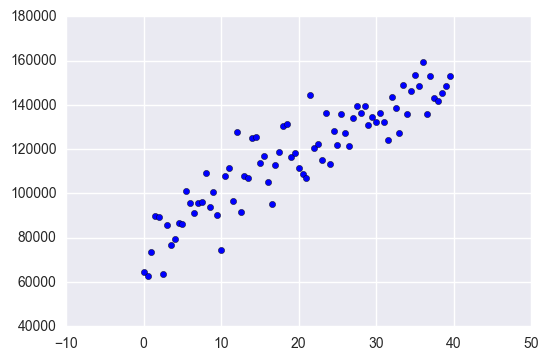

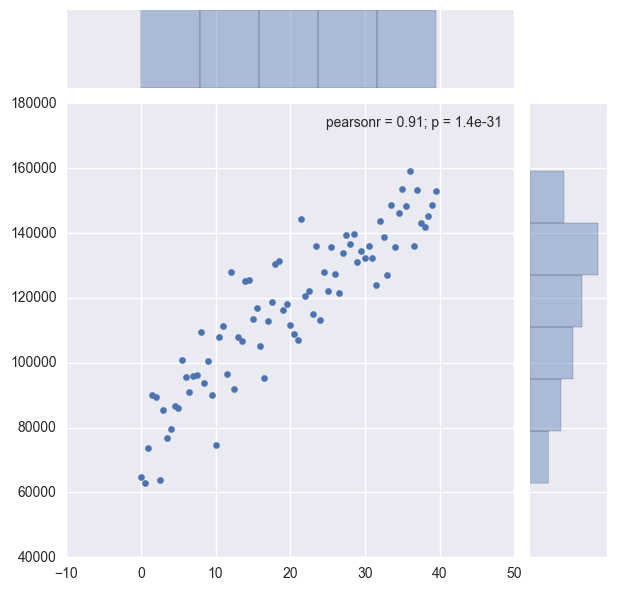

In [15]:
plt.scatter(years, salary)
sns.jointplot(years,salary)

## 3. Train a Linear Regression Model using Gradient Descent

Let's reuse our adaptive_optimum() function from the gradient descent module
This function automatically finds the optimal value of gamma. 

<b>theta : - intercept and coefficient of the model <br>
gamma      : - learning rate <br>
t          : - is the decrease rate of gamma <br>
precision  : -  $1  (salary) this is precise enough </b>

In [16]:
# plot y (the actual data) vs. y_hat (the model)
from IPython.display import Image
from IPython.core.display import HTML 
Image(url='https://qph.ec.quoracdn.net/main-qimg-1ec77cdbb354c3b9d439fbe436dc5d4f-p') 


In [34]:
#set the initial values of the parameters
init_theta=[1,1]
gamma = 1
t=0.9
precision =1
start_time=time.time()
#call the function to find the minimum cost, theta, and the optimal learning rate
theta = adaptive_optimum(init_theta,gamma,t,precision)
print(time.time() - start_time)


found minimum cost:  7684735996.85
the optimum theta:  [79958.203991839677, 1864.8714513134084]
the gamma used :  3.986723479010574e-06
18.42405390739441


In [17]:
#combine X, y into a list
data=list(zip(years, salary))

In [18]:
#create the functions we need for calcuating theta

# error = y_i - y_hat_i
def error(theta, x_i, y_i):
    return y_i- (theta[0]+theta[1]*x_i)

# SSE (sum squared error)
def calculate_SSE(theta):
    
    return sum(error(theta, x_i, y_i)**2 for x_i, y_i in data)

# update theta based on -2*gamma*partialDerivative
def update_theta(theta, gamma):
       
    gradient=[0,0]
    gradient[0] = -2*sum(error(theta, x_i, y_i) for x_i, y_i in data)
    gradient[1] = -2*sum(error(theta, x_i, y_i)*x_i for x_i, y_i in data)
    return [theta[0]-gamma*gradient[0], theta[1]-gamma*gradient[1]]

#Gradient Descent method 
#input: original theta, gamma=1, t=0.9, precision =1
#output: return converged theta
def adaptive_optimum(theta, gamma, t, precision):
    #infinite loop
    while True:
        #shrink gamma by t in each iteration
        gamma *=t
        #get the current SSE based on theta
        old_SSE = calculate_SSE(theta)
        #try to update theta 10 times
        for i in range(10):
            temp_theta =update_theta(theta, gamma) 
        #after 10 loops if the new SSE doesn't converge    
        new_SSE_10 = calculate_SSE(temp_theta)
        if new_SSE_10 > old_SSE:  # not shrinking
            #stop the current iteration
            continue
        #if SSE started to converge
        else:
            #try a large or infinite loop
            for i in range(100000):
                #update theta
                theta =update_theta(theta, gamma) 
                #caculate SSE after the update
                new_SSE = calculate_SSE(theta)
                #if the different of the updated SSE is less than $1
                if abs(old_SSE - new_SSE) < precision:
                    #print out the optimal values
                    print("found minimum cost: ", new_SSE)
                    print("the optimum theta: ", theta)
                    print("the gamma used : ",gamma)
                    #return theta back to funciton call
                    return theta

## 4. Model Evaluation

R_squared shows how much variation of y is explained by the prediction model. 
${R^2} = \frac{{Explained\;Variation}}{{Total\;Variation}} = 1 - \frac{{Unexplained\;Variation}}{{Total\;Variation}} = 1 - \frac{{\sum {{\left( {{y_i} - \widehat {{y_i}}} \right)}^2}}}{{\sum {{\left( {{y_i} - \bar y} \right)}^2}}}$

In [20]:
#R_squared explained
from IPython.display import IFrame
IFrame('https://en.wikipedia.org/wiki/Coefficient_of_determination', width=1200, height=300)

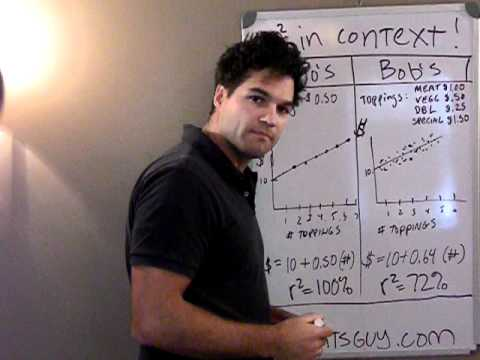

In [21]:
#R_squared explained on YouTube
from IPython.display import YouTubeVideo
YouTubeVideo('IMjrEeeDB-Y')

In [22]:
# yi-y_mean
# yi_y_hat

y_hat = [(theta[0]+theta[1]*x) for x in years]
#total error
y_mean = sum(salary)/len(salary) 
v = sum((salary-y_mean)**2)

#residual error
u = sum((salary-y_hat)**2)

R_squared = 1 - u/v
print("R squared is ", R_squared)

R squared is  0.828369524951


# Reflection 1. 

We used gradient descent method to find the optimal theta. We also learned what R_squared means. 
Will the optimal theta gives us the best model or highest R_squared? 
The answer is ...  it depends
How about our X and y don't have a linear relationship? 
How about the data is noisy or with outliers? 
How about there are other parameters we need to take consideration? 
We will deal with these advanced topics in a future module.


Everything seems to work perfectly so far. We got the best model from training the data. 
One thing that may cause concern is the computing speed. We've got a fairly small dataset, 80 data points. 
It took us more than 20 seconds to find the calculate (the time varies on different computers). 

How about we are processing a dataset with 90000 data points? How about 9billion data points? 
The computation may take for ever. We can test it by extending the range of X in this example
although we don't expect some one to have 90000 years of work experience and earn billions of dollars a year.

Remember in a previous module, we learn numpy's matrix operation capacity. numpy is optimized for vector and matrix
calculation through numpy.dot() function. If we can convert all the loops in our program to numpy.dot() operation, 
the program will run much faster. This process is called vectorization. 

## Matrix Dot Product

In [23]:
#R_squared explained
from IPython.display import IFrame
IFrame('https://en.wikipedia.org/wiki/Matrix_multiplication#Illustration', width=1200, height=300)


In [29]:
#convert theta and y lists to numpy arrays
theta = np.array(theta)
print(theta.shape)
y=np.array(salary)

#convert X to a nX2 matrix, n is the number samples, and the first column of X is 1
X = np.array(years)
print(X.shape)
print(X.ndim)

#Create a ones vector
ones = np.ones((X.shape[0],1))
print(ones.shape)


#make ones the first vector/column in X 
X = np.reshape(X, (X.shape[0],1))
X = np.concatenate((ones,X),axis=1)

print(X.shape)
print(X[0:4,:])

(2,)
(80,)
1
(80, 1)
(80, 2)
[[ 1.   0. ]
 [ 1.   0.5]
 [ 1.   1. ]
 [ 1.   1.5]]


In [31]:
# X is 80x2 * 2x1 =  80x1
y_hat = X.dot(theta)
#total error
y_mean = sum(salary)/len(salary) 
v = sum((salary-y_mean)**2)

#residual error
u = sum((salary-y_hat)**2)

R_squared = 1 - u/v
print("R squared is ", R_squared)


R squared is  0.828369524951


### Great! We got the same result! But... What's the point? 

### Let's compare the two methods of calculating R_squred

In [32]:
start_time = time.time()
#repeat the calculation for a number of times 
for _ in range(100000):
    #y_hat: predicted values
    y_hat = [(theta[0]+theta[1]*x) for x in years]

    # the total error 
    u=sum((salary-y_hat)**2)

    # residual error
    y_mean = sum(salary)/len(salary)
    v=sum((salary-y_mean)**2)

    # r_squared is 1-u/v
    R_squared = (1-u/v)
print("the calculation without vectorization takes ", time.time()-start_time, " seconds.")
print(R_squared)

the calculation without vectorization takes  10.959626913070679  seconds.
0.828369524951


In [33]:

start_time = time.time()
for _ in range(100000):
    
    #y_hat: predicted values
    #y_hat = [(theta[0]+theta[1]*x) for x in years]
    y_hat = X.dot(theta)  #nx2 * 2x1 --> nx1

    # the total error 
    u=((y-y_hat)**2).sum()

    # residual error
    v=((y-y.mean())**2).sum()

    # r_squared is 1-u/v
    R_squared = (1-u/v)
print("the calculation with vectorization takes ", time.time()-start_time, " seconds.")
print(R_squared)

the calculation with vectorization takes  3.2631866931915283  seconds.
0.828369524951


# Let's try Sklearn Package

In [35]:
from sklearn import linear_model
#we can see that the available library is very efficent

start_time = time.time()

model = linear_model.LinearRegression()
model.fit(X, y)
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)
print("the calculation takes ", time.time()-start_time, " seconds.")
print(model.score(X, y))

Intercept: 
 79958.2039918
Coefficients: 
 [    0.          1864.87145131]
the calculation takes  0.009000539779663086  seconds.
0.828369524951
